<a href="https://colab.research.google.com/github/TaylorL74/data-and-python/blob/main/STEAM_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini project to analyse purchase data from the STEAM platform



---



## The Problem



---



The STEAM games platform provides a subscription service for players and a platform for purchasing games.  Users on the STEAM platform often try out a game before purchasing but some just visit the site to purchase new games.  Each user has a unique ID.

STEAM publish various statistics, like the top games by number of online players, but there are interesting questions to ask about purchased games.

**How many different games are purchased by each user and what is the average number of games per user?**

**How active are most users in purchasing games?**

Knowing the answers to these questions, it will be possible to **identify the most popular games and the most active users.**  The plaform operators might start to offer rewards for high levels of activity on the platform, or discount offers for those who buy fewer games.

## Data Collection



---



To answer the questions above we will need to import data on game purchases by users. We will use a file of data from the STEAM platform containing three columns, a UserID, a Game Title, and whether the game has been purchased or played. For our purpose we are mostly interesting in the purchasing data.

 It is not the most up to date but the data is quite specific for this problem and gives an insight into what could be done on an ongoing basis to have these types of insight regularly available.

File:  https://docs.google.com/spreadsheets/d/1jIla2fCpkdMYgh9rq0icScURjMravr7nUHFCXvV-rXE/edit?usp=drive_link

In [ ]:
import pandas as pd
from google.colab import drive

# Mount Drive in order to access file location
def mount_drive():
  drive.mount("/content/drive", force_remount=True)
  folderpath = "/content/drive/My Drive/SteamProject"
  return folderpath

# Load data from CSV file stored in Google Drive
def get_data(path):
  # List of column names to add headers to columns upon loading
  column_names = ["userid", "game", "status"]
  try:
    df = pd.read_csv(path + "/Steam-200k-3-column.csv", names=column_names)
    return df
  except:
    print("There was a problem and the file could not be opened.")

# Read the data from the file into the variable df, then display the data. The data in df will be available in cells further down
path = mount_drive()
df = get_data(path)
display(df)

Mounted at /content/drive


,userid,game,status
0,151603712,The Elder Scrolls V Skyrim,purchase
1,151603712,The Elder Scrolls V Skyrim,play
2,151603712,Fallout 4,purchase
3,151603712,Fallout 4,play
4,151603712,Spore,purchase
...,...,...,...
199995,128470551,Titan Souls,play
199996,128470551,Grand Theft Auto Vice City,purchase
199997,128470551,Grand Theft Auto Vice City,play
199998,128470551,RUSH,purchase


## Cleaning and Transforming Data



---



### Unique Values
In order to get a sense of the data, we will first isolate the unique values in both the UserID and Game Title column, and determine how many unique users and game titles are contained within our dataset.


In [ ]:
def create_lists():
  # Add the unique user IDs and game titles to their respective lists using the .unique() function
  users = df["userid"].unique().tolist()
  games = df["game"].unique().tolist()
  return users, games

users, games = create_lists()
print("List of Unique Users")
print(users)
print("\n"+"-"*40)
print("List of Unique Games")
print(games)

List of Unique Users
[151603712, 187131847, 59945701, 53875128, 234941318, 140954425, 26122540, 176410694, 197278511, 150128162, 197455089, 63024728, 297811211, 76933274, 218323237, 302186258, 126340495, 256193015, 194895541, 30007387, 170625356, 159538705, 167362888, 208649703, 299889828, 225987202, 195071563, 254906420, 247160953, 308653033, 144138643, 197902002, 97298878, 173909336, 198572546, 219509107, 202906503, 92107940, 251431515, 233558010, 99189757, 30695285, 259648553, 201069271, 48845802, 226212066, 221430493, 62923086, 250006052, 65117175, 227944885, 144004384, 236557903, 11373749, 140293612, 187851224, 192921532, 54103616, 222277839, 298547051, 264253640, 125718844, 230599183, 280061602, 38763767, 164543231, 211277578, 214167822, 163617342, 295931968, 196354657, 165034415, 298389371, 27543430, 126640783, 119410870, 243440565, 157694162, 154868247, 263856756, 124395695, 126656629, 197821092, 294797577, 228507886, 272425320, 49769103, 202742019, 239397807, 65758675, 2399218

In [ ]:
# Finding the number of unique users and games in the dataset, and returning the value so it can be used later
def describe_data():
  total_users = len(users)
  total_games = len(games)
  print("\n"+"-"*40)
  print(f"The number of unique users is {total_users}")
  print(f"The number of unique games is {total_games}")
  print("\n"+"-"*40)
  return total_users, total_games

total_users, total_games = describe_data()


----------------------------------------
The number of unique users is 12393
The number of unique games is 5155

----------------------------------------


---

### Filtering Purchased Data
To find only purchasing data it will be necessary to filter the df for just those rows containing "purchase" in column 3.

The above lists of unique values will still work for this dataframe as the "play" rows can only exist after a corresponding "purchase".

In [ ]:
# Creating a df with just the purchased games information, to prevent games that have been purchased and played as counting twice
def filter_purchased():
  purchased_df = df[df["status"] == "purchase"]
  return purchased_df

purchased_df = filter_purchased()

---
### Duplicates

Now we have a filtered dataset, we can check for duplicates of combined userIDs and game titles.






In [ ]:
# Checking for duplicate values in the new filtered df
def check_duplicates():
  # Keep = False ensures we could every occurance of duplication in the dataset
  duplicated = purchased_df[purchased_df.duplicated(subset=["userid", "game"], keep=False)]
  if len(duplicated) == 0:
    print("There are no duplicate values in the dataset.")
  else:
    print("Duplicated rows found:")
    display(duplicated)

  # Counting each instance of a userid and game title pair in the duplicates dataset, to see how many times each record is duplicated
  duplicate_counts = duplicated.groupby(["userid", "game"]).size()
  print("\n"+"-"*40)
  print(f"The maximum number of times a duplicated value appears in the dataset is {duplicate_counts.max()}")

  # Dislaying all the games that have been affected by duplication, and how many times they are duplicated
  duplicated_games_count = duplicated.groupby(["game"]).size()
  print("\n"+"-"*40)
  print(duplicated_games_count)

check_duplicates()


Duplicated rows found:


,userid,game,status
1787,11373749,Sid Meier's Civilization IV,purchase
1968,11373749,Sid Meier's Civilization IV,purchase
1969,11373749,Sid Meier's Civilization IV Beyond the Sword,purchase
1970,11373749,Sid Meier's Civilization IV Beyond the Sword,purchase
1971,11373749,Sid Meier's Civilization IV Warlords,purchase
...,...,...,...
195815,112845094,Grand Theft Auto III,purchase
195821,112845094,Grand Theft Auto San Andreas,purchase
195822,112845094,Grand Theft Auto Vice City,purchase
195823,112845094,Grand Theft Auto Vice City,purchase



----------------------------------------
The maximum number of times a duplicated value appears in the dataset is 2

----------------------------------------
game
Arma 2                                            2
Crysis 2                                         14
Grand Theft Auto III                            180
Grand Theft Auto San Andreas                    344
Grand Theft Auto Vice City                      206
Sid Meier's Civilization IV                     196
Sid Meier's Civilization IV Beyond the Sword    160
Sid Meier's Civilization IV Colonization        150
Sid Meier's Civilization IV Warlords            158
TERA                                              2
Tom Clancy's H.A.W.X. 2                           2
dtype: int64


---
After searching for duplicates there appears to be 707 values that appear twice in the dataframe, for a total of 1414 rows (we know no duplicated value appears more than twice because we checked to see the maximum count of any userID and Game Title pair)

I wanted to explore the duplicated values a little further, as while it isn't possible for a user to buy one game multiple times for personal use on Steam, the platform does allow users to gift games to other users, and that information would still be worth keeping in for the purposes of exploring user purchasing habits.

However, if these duplicates were the result of gifting, it might be expected that they would cover more than 11 of the 5155 unique games in the dataset. That is why I determined the duplications were more likely the result of an error in the dataset and removed them below.

In [ ]:
def remove_duplicates():
  purchased_df_no_dup = purchased_df.drop_duplicates(subset=["userid", "game"], keep="first")
  return purchased_df_no_dup

purchased_df = remove_duplicates()

## Analyse
---



As part of my analysis I created two new datasets, one showing how many times each game was purchased (game_purchases), and another showing how many purchases each user made (user_purchases).

### Game Purchases Data

In exploring the game_purchases df, I isolated and displayed the 10 most popular games, and counted how many games had only been purchased one time, to get a sense of the range and distribution of game purchases.

I also found out the average number of times each game was purchased, and how many games had an above average number of purchases.

In [ ]:
# Creating a new dataset showing how many times each game was purchased. Columns are renamed to match the new data, and sorted from highest to lowest number of purchases.
def game_purchases_df():
  game_purchases = purchased_df.groupby("game")["userid"].count().reset_index()
  game_purchases.columns = ["game", "purchases"]
  game_purchases = game_purchases.sort_values(by="purchases", ascending=False)
  return game_purchases

game_purchases = game_purchases_df()


def explore_game_purchased_df():
  # Displaying the top 10 most purchased games, and finding how many games on the list had only been purchased one time, and what percentage of the total number of games this represents.
  print("\n" + "-"*40)
  print("The 10 most popular games are:")
  display(game_purchases.head(10))

  one_purchase_list = game_purchases[game_purchases["purchases"] == 1]
  print("\n" + "-"*40)
  print(f"There are {len(one_purchase_list)} games with only one purchase. That is {round((len(one_purchase_list) / total_games)*100, 1)}% of all games in the dataset.")
  print("\n" + "-"*40)

  # Finding the average number of purchases per game
  mean_purchases = game_purchases["purchases"].mean()
  print(f"The average number of purchases per game is {round(mean_purchases, 1)}.")
  print("\n" + "-"*40)

  # Finding how many games in the dataset had an above average number of purchases
  games_above_average = game_purchases[game_purchases["purchases"] > mean_purchases]
  print(f"There are {len(games_above_average)} games with more purchases than the average.")

explore_game_purchased_df()



----------------------------------------
The 10 most popular games are:


,game,purchases
1336,Dota 2,4841
4257,Team Fortress 2,2323
4788,Unturned,1563
981,Counter-Strike Global Offensive,1412
2074,Half-Life 2 Lost Coast,981
984,Counter-Strike Source,978
2475,Left 4 Dead 2,951
978,Counter-Strike,856
4899,Warframe,847
2071,Half-Life 2 Deathmatch,823



----------------------------------------
There are 1170 games with only one purchase. That is 22.7% of all games in the dataset.

----------------------------------------
The average number of purchases per game is 25.0.

----------------------------------------
There are 1030 games with more purchases than the average.


---
Additionally I was interested to see how many games were considered outliers using a normal distribution range of within 1.5 times the Interquartile Range below the first quartile, or above the third.

In [ ]:
# Importing numpy for the outlier calculations
import numpy as np

def find_outliers_games():

  # Finding the Interquartile range of the data, and calcuating the upper and lower bounds of non-outlier data
  gp_q1 = game_purchases["purchases"].quantile(0.25)
  gp_q3 = game_purchases["purchases"].quantile(0.75)
  gp_iqr = gp_q3 - gp_q1
  gp_lower = gp_q1 - (1.5 * gp_iqr)
  gp_upper = gp_q3 + (1.5 * gp_iqr)

  # Creating a new df, filtered to just include the outliers in the data, those with values that lie outside the normal distribution of the data
  # and calculating the percentage of all data they represent
  gp_outliers = game_purchases[(game_purchases["purchases"] < gp_lower) | (game_purchases["purchases"] > gp_upper)]
  print(f"There are {len(gp_outliers)} outliers in the game_purchases dataset. This represents {round(len(gp_outliers)/ total_games*100, 1)}% of all games in the dataset.")

find_outliers_games()

There are 629 outliers in the game_purchases dataset. This represents 12.2% of all games in the dataset.


---
### User Purchases Data
I repeated much of the same analysis I conducted on the dataset about game purchases, on the dataset about user purchases, though I chose to isolate the user who bought the most games rather than create a to 10 list like I did for the games, as the categorical information of the game title is more meaningful than the userID when viewed in a tabular format.

In [ ]:
def user_purchases_df():
  user_purchases = purchased_df.groupby("userid")["game"].count().reset_index()
  user_purchases.columns = ["userid", "purchases"]
  user_purchases = user_purchases.sort_values(by="purchases", ascending=False)
  return user_purchases

user_purchases = user_purchases_df()

def explore_user_purchased_df():
  # Use .iloc to isolate the highest number of game purchases associated with a single user
  print(f"The most games bought by a single user was {user_purchases['purchases'].iloc[0]}.")
  print("\n" + "-"*40)

  # Find the number of users who only bought one game, and display as a percentage of all users
  one_purchase_list = user_purchases[user_purchases["purchases"] == 1]
  print(f"There are {len(one_purchase_list)} users who only bought one game. That is {round((len(one_purchase_list) / total_users)*100, 1)}% of all users in the dataset.")
  print("\n" + "-"*40)

  # Display the average number of games bought per user
  mean_purchases = user_purchases["purchases"].mean()
  print(f"The average number of games bought per user is {round(mean_purchases, 1)}.")
  print("\n" + "-"*40)

  # Finding how many users bought more games than the average
  users_above_average = user_purchases[user_purchases["purchases"] > mean_purchases]
  print(f"There are {len(users_above_average)} users who bought more games than the average.")

explore_user_purchased_df()

The most games bought by a single user was 1068.

----------------------------------------
There are 5700 users who only bought one game. That is 46.0% of all users in the dataset.

----------------------------------------
The average number of games bought per user is 10.4.

----------------------------------------
There are 2018 users who bought more games than the average.


---
Once again I was interested in the outliers.

The number and percentage of outliers is quite high for both user and game purchases, showing that in both datasets there is a significant range of purchasing habits, and a significant portion of data lies at an extreme end of the available data.

Because it could be useful to see extreme purchasing behaviour, whether in terms of low or high purchases, for the purposes of our analysis, I did not choose to remove outliers on this occassion, but it is useful to know out data is not distributed in an even manner.  

In [ ]:
# Calcuating outliers for the user purchasing data, same process as for game purchases outliers
def find_outliers_users():
  up_q1 = user_purchases["purchases"].quantile(0.25)
  up_q3 = user_purchases["purchases"].quantile(0.75)
  up_iqr = up_q3 - up_q1
  up_lower = up_q1 - (1.5 * up_iqr)
  up_upper = up_q3 + (1.5 * up_iqr)
  up_outliers = user_purchases[(user_purchases["purchases"] < up_lower) | (user_purchases["purchases"] > up_upper)]
  print(f"There are {len(up_outliers)} outliers in the user_purchases dataset. This represents {round((len(up_outliers)/total_users)*100, 1)}% of users that purchased games.")

find_outliers_users()

There are 1672 outliers in the user_purchases dataset. This represents 13.5% of users that purchased games.


---
### Saving New Files
With the above analysis complete, I needed to export the files I had created for use in other visualisation software.

In [ ]:
from google.colab import files
# Save file so it can be imported into Tableau
def save_file(df, filename):
  savefile = df.to_csv(filename + ".csv", index=False)
  files.download(filename + ".csv")

save_file(game_purchases, "game_purchases")
save_file(user_purchases, "user_purchases")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Interpret and Visualise


---



I imported the game_purchases and user_purchases csv files created above into Tableau in order to visualise the data. A link to the dashboard on Tableau public can be found [here](https://public.tableau.com/app/profile/taylor.logan/viz/SteamPurchasesDataset/Dashboard1).


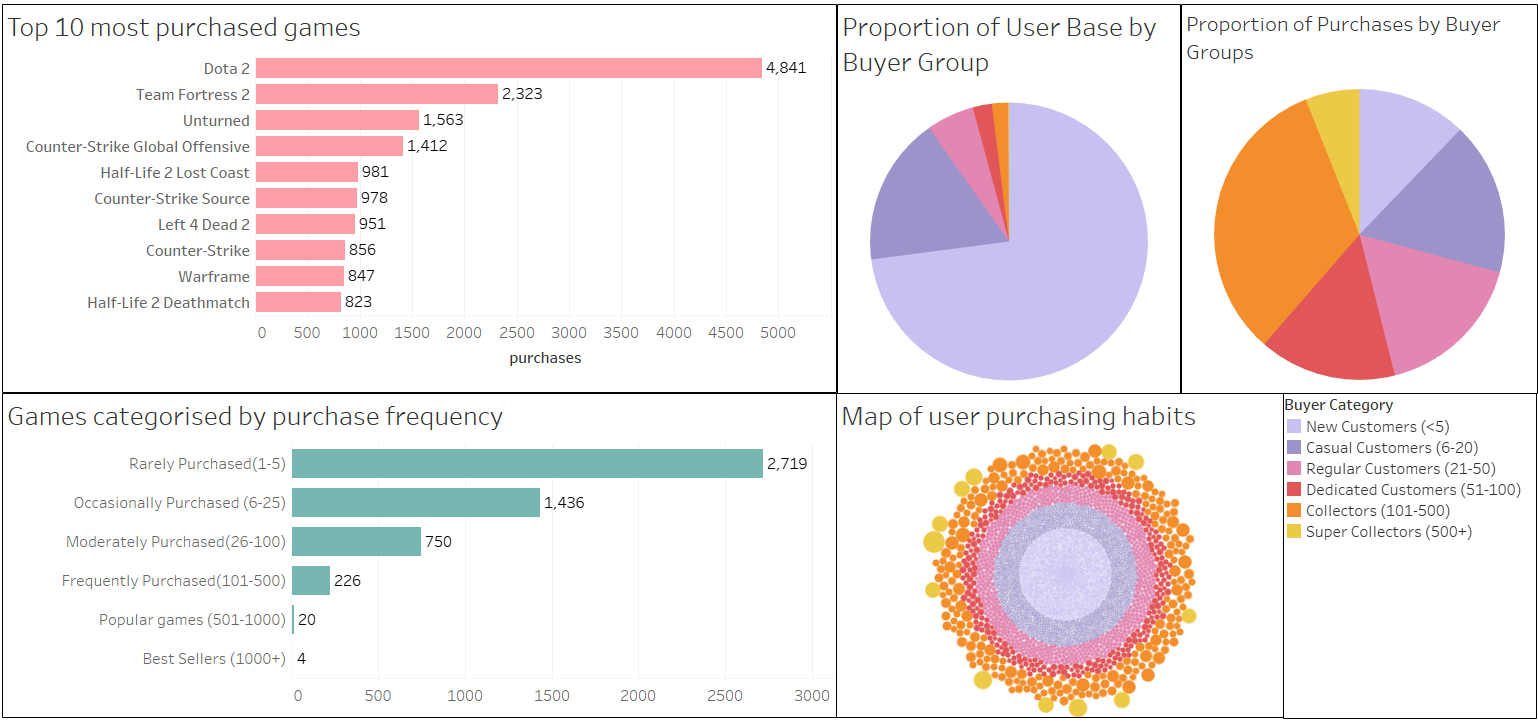

---
### Top 10 Most Purchased Games
The first visualisation I created shows the Top 10 most purchased games. Here we can see that Dota 2 has significantly more purchases than any other game, and that only 3 games in the dataset have over 1000 purchases.

If we had data about feature of the games such as genre, or multiplayer compatability, we could have used colour to indicate this in the graph. We could also have examined the most popular games in different years or months if this data had been available.

Something we can tell from the data is that many of the most popular games are sequels, suggesting that games may be more successful if they have a fanbase already following the franchise, or perhaps game developers make better games when they have learned from previous installments in a franchise.

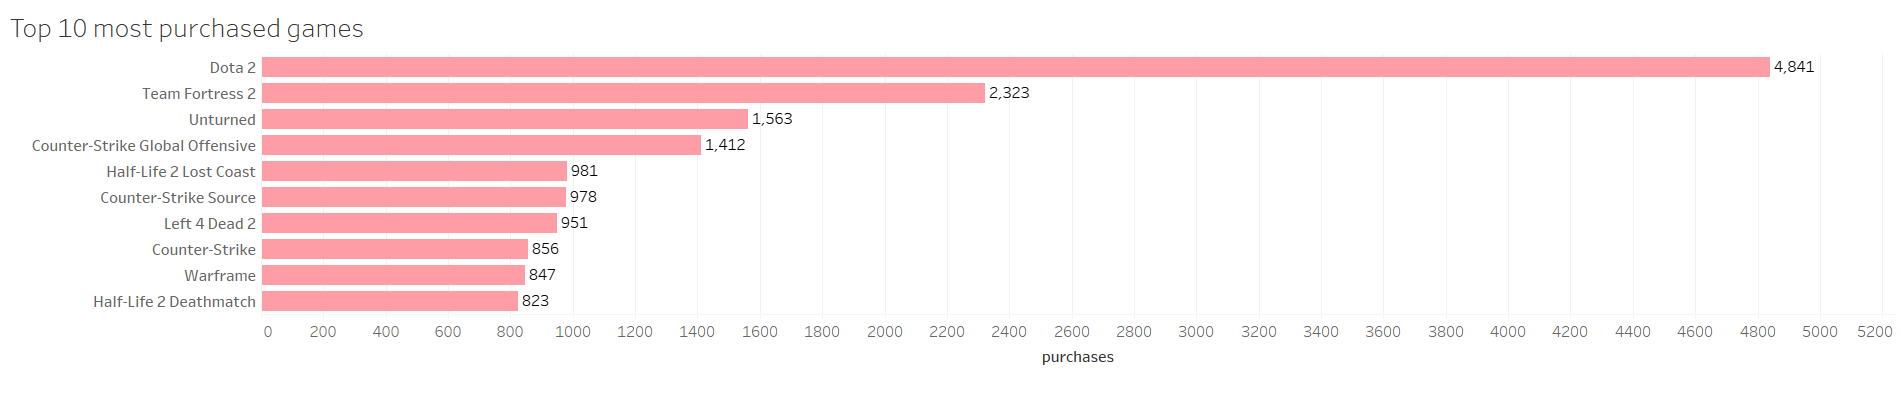

---
### Games Categorised by Purchase Frequency
I created a second horizontal bar chart from the games_purchased dataset, this time based on groupings of how frequently each game appeared in the dataset, reflecting how often it had been purchased by users.

The groupings were not evenly spaced, as the majority of games were concentrated towards the lower end of the scale of purchases, in a long-tail distribution.

From this graph we can see that of the 5155 different games in the dataset, over half were purchased by fewer than 5 users, and only 250 games were purchased more than 100 times. This distrubution of the data suggests that to increase game sales, a significant amount of focus should be on identifying the small number of games likely to do well and appeal to larger audiences, while the majority of games on the platform are unlikely to drive many game sales.

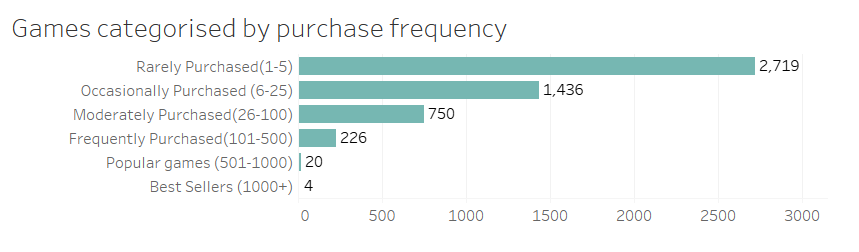

Below is the formula I used to sort the data into bin groupings for the purposes of the above visualisation.

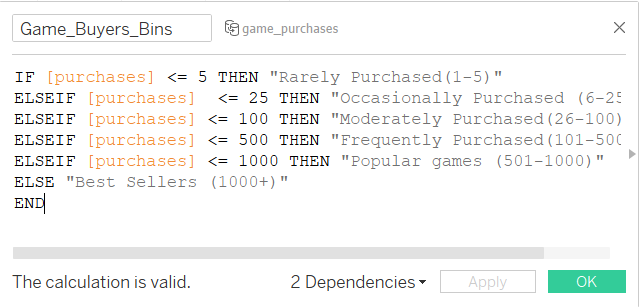

### Proportion of Purchases by Buyer Groups

Next I looked at the User Purchases dataset, which I split into 6 Buyer Groups, determined by how many purchases each user had made. This was designed to identify new or infrequent customers from those who purchase games on Steam frequently, or who a huge number of games on steam.



Below is the formula I used when sorting user purchasing data into bin groups.

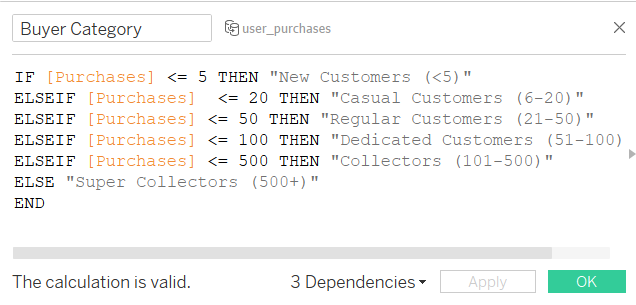

### User Purchasing Behaviour

I created three visualisations from these buyer groups, including two pie charts which show the proportion of the user base which falls into each buyer group, and the proportion all purchases attributed to users in each buyer group.

The first pie chart shows the demographic distribution of users across the buyer groups. It reveals that the vast majority of users (almost 73%) have made fewer than five purchases. The "Super Collector" group (users with over 500 games purchased) is so small that it is barely visible on the pie chart.

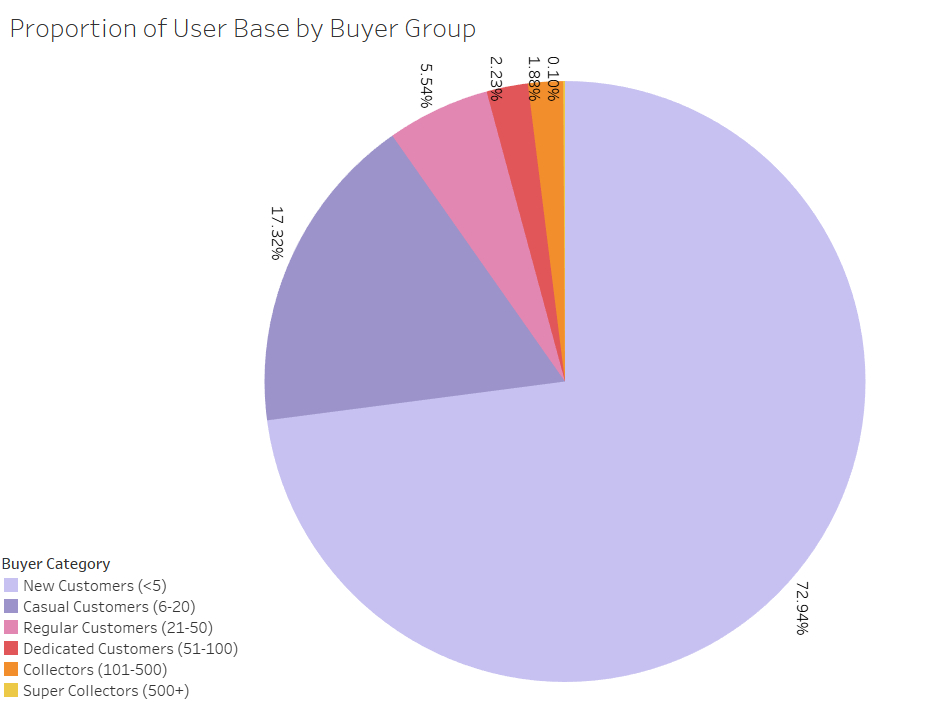

The second pie chart presents the proportion of all purchases attributed to each buyer group. It shows a stark contrast to the user demographic chart. While "Super Collectors" make up just 0.1% of all Steams users, they are responsible for over 6% of the sales in the dataset. More notably, the "Collectors" group, which make up only 1.88% of all users, but are responsible for almost one third of sales. These two groups represent a small, but highly active portion of the user base.

Overall, under 10% of all users are contributing over 70% of all sales, making the regular, dedicated and collectors buyer groups valueable customers for Steam.

The data also shows how many new or infrequent users exist, who could potentially be driven to make more purchases through upselling or advertisement. Data on when purchases were made would be helpful here in distinguishing new users, from users who made purchases in the past but have since not returning to buy more games.

Another further opportunity for research would be collecting data on user experience and expectations, to see what specific changes or marketing make users more likely to purchase games.



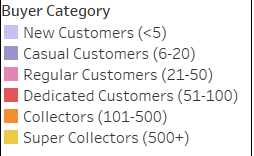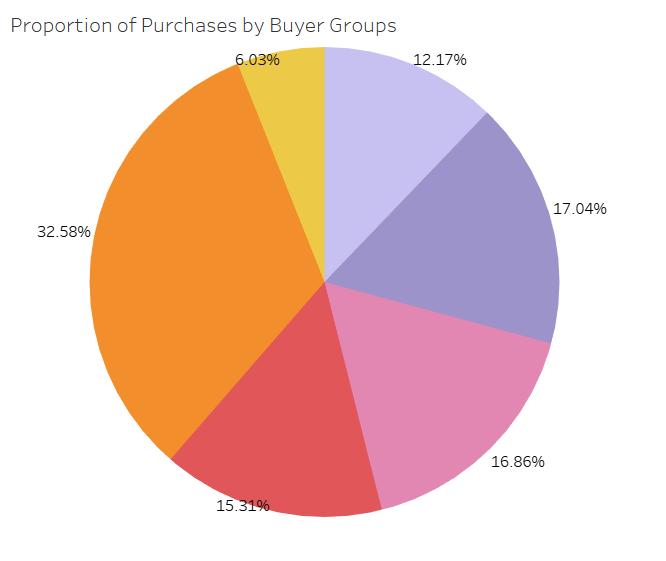

I also created an additional visualisation to further display the range of user activity across the users in the dataset. This bubble chart displays the number of purchases made by each user as the size of the bubble, and it is arranged and coloured by the buyer categories used in the two pie charts. This helps illustrate the disproportionate portion of purchases attributable to a small number of users.

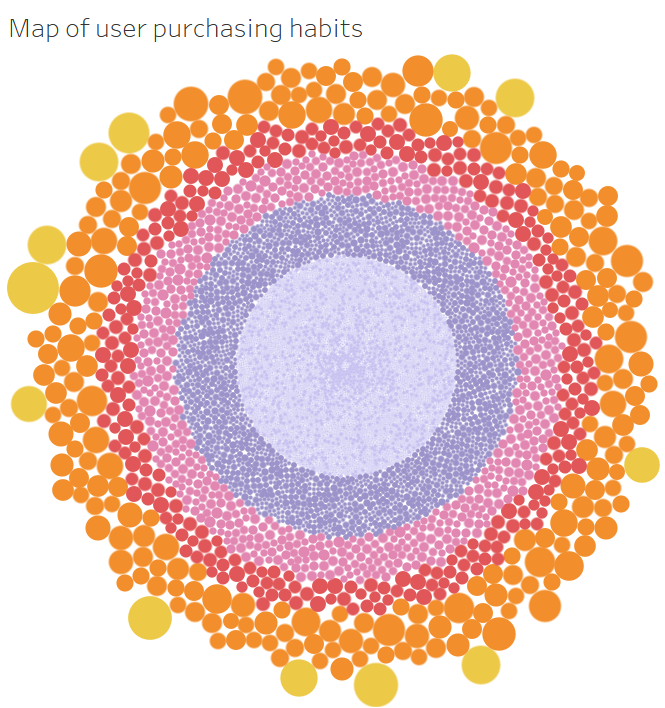

# Conclusion and Key Insights

In examining the data about Steam game purchases we have been able to identify some patterns in game popularity and user purchasing activity. Some key insights we have found are:


* The average number of times a game in this data set has been bought is 25, and the average number of games a user buys is 10.4. This data is likely skewed by a long-tail distribution, where there are many data-points with low purchase numbers, and a small number of data points with much higher purchase numbers.
*   Best-selling games such are Dota 2 are outliers when considering average purchase numbers for most games. The majority of games on Steam are only bought by a small handful of users, and over 20% of games have only been bought once.
*   The majority of purchases on Steam are made by less than 10% of total users, and Steam should continue to focus efforts on ways to drive sales among this group.
* However there is also a largely untapped market among new or infrequent customers, who make up 73% of total users. Targeted marketing, upselling, and user experience improvements could encourage these users to become more active buyers.



### Further Research

If I was taking this research project further, I would want to gather more data about the games, such as genre, release data, and features such as multiplayer/singleplayer compatability.

Data from sources external to Steam could also be valuable, such as how popular certain games are on streaming platforms like Twitch or Youtube, as this exposure can help drive sales.

Additional data on users and their purchases could also be beneficial, such as user experience information gathered from surveys, timing of purchases and timing of sales and special offers etc.

This information would help create a fuller picture of the factors driving game sales and user behaviour on Steam.

## Evaluate the Process


---



### What went well

I am pleased with how the visualisations turned out, I believe splitting both the games and the users into groups based on respective purchase numbers helped make the data clearer and easier to visualise and understand.

I am also happy with how I analysed the data in Python before moving to Tableau, as I think this helped give me an idea of the uneven spread and distribution of the data, which helped me narrow down what I wanted to try and visualise and examine in Tableau.

### What I would do differently

I think if I was doing this again, I would have also exported the original purchased_df data to Tableau, so that I could do more visualisation that combined both the user and game data, rather than only bringing the seperated tables into the visualisation software.

An example of what that would have allowed me to do is to explore whether the games bought by under 5 users were more likely to be bought by those who owned lots of games, or those who only purchased a handful of games. This could have given an indication of whether those who only bought a few games tend to the most popular games, or whether they have niche interests which are only filled by a few games, hence explaining their low number of purchases.